# Import libraries

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from  sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split, RandomizedSearchCV

# set columns show max 25
pd.set_option('display.max_columns', 25)

import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('preprocessed/df.csv')
df.head()

,Age,Gender,Years at Company,Job Role,Monthly Income,Work-Life Balance,Job Satisfaction,Performance Rating,Number of Promotions,Overtime,Distance from Home,Education Level,Marital Status,Number of Dependents,Job Level,Company Size,Company Tenure,Remote Work,Leadership Opportunities,Innovation Opportunities,Company Reputation,Employee Recognition,Attrition
0,31,1,19,0,5390,4,2,3,2,0,22,3,1,0,2,2,89,0,0,0,4,2,1
1,59,0,4,3,5534,1,3,1,3,0,21,4,0,3,2,2,21,0,0,0,2,1,1
2,24,0,10,2,8159,3,3,1,0,0,11,2,1,3,2,2,74,0,0,0,1,1,1
3,36,0,7,0,3989,3,3,4,1,0,27,1,2,2,2,1,50,1,0,0,3,2,1
4,56,1,41,0,4821,2,4,3,0,1,71,1,0,0,3,2,68,0,0,0,2,2,1


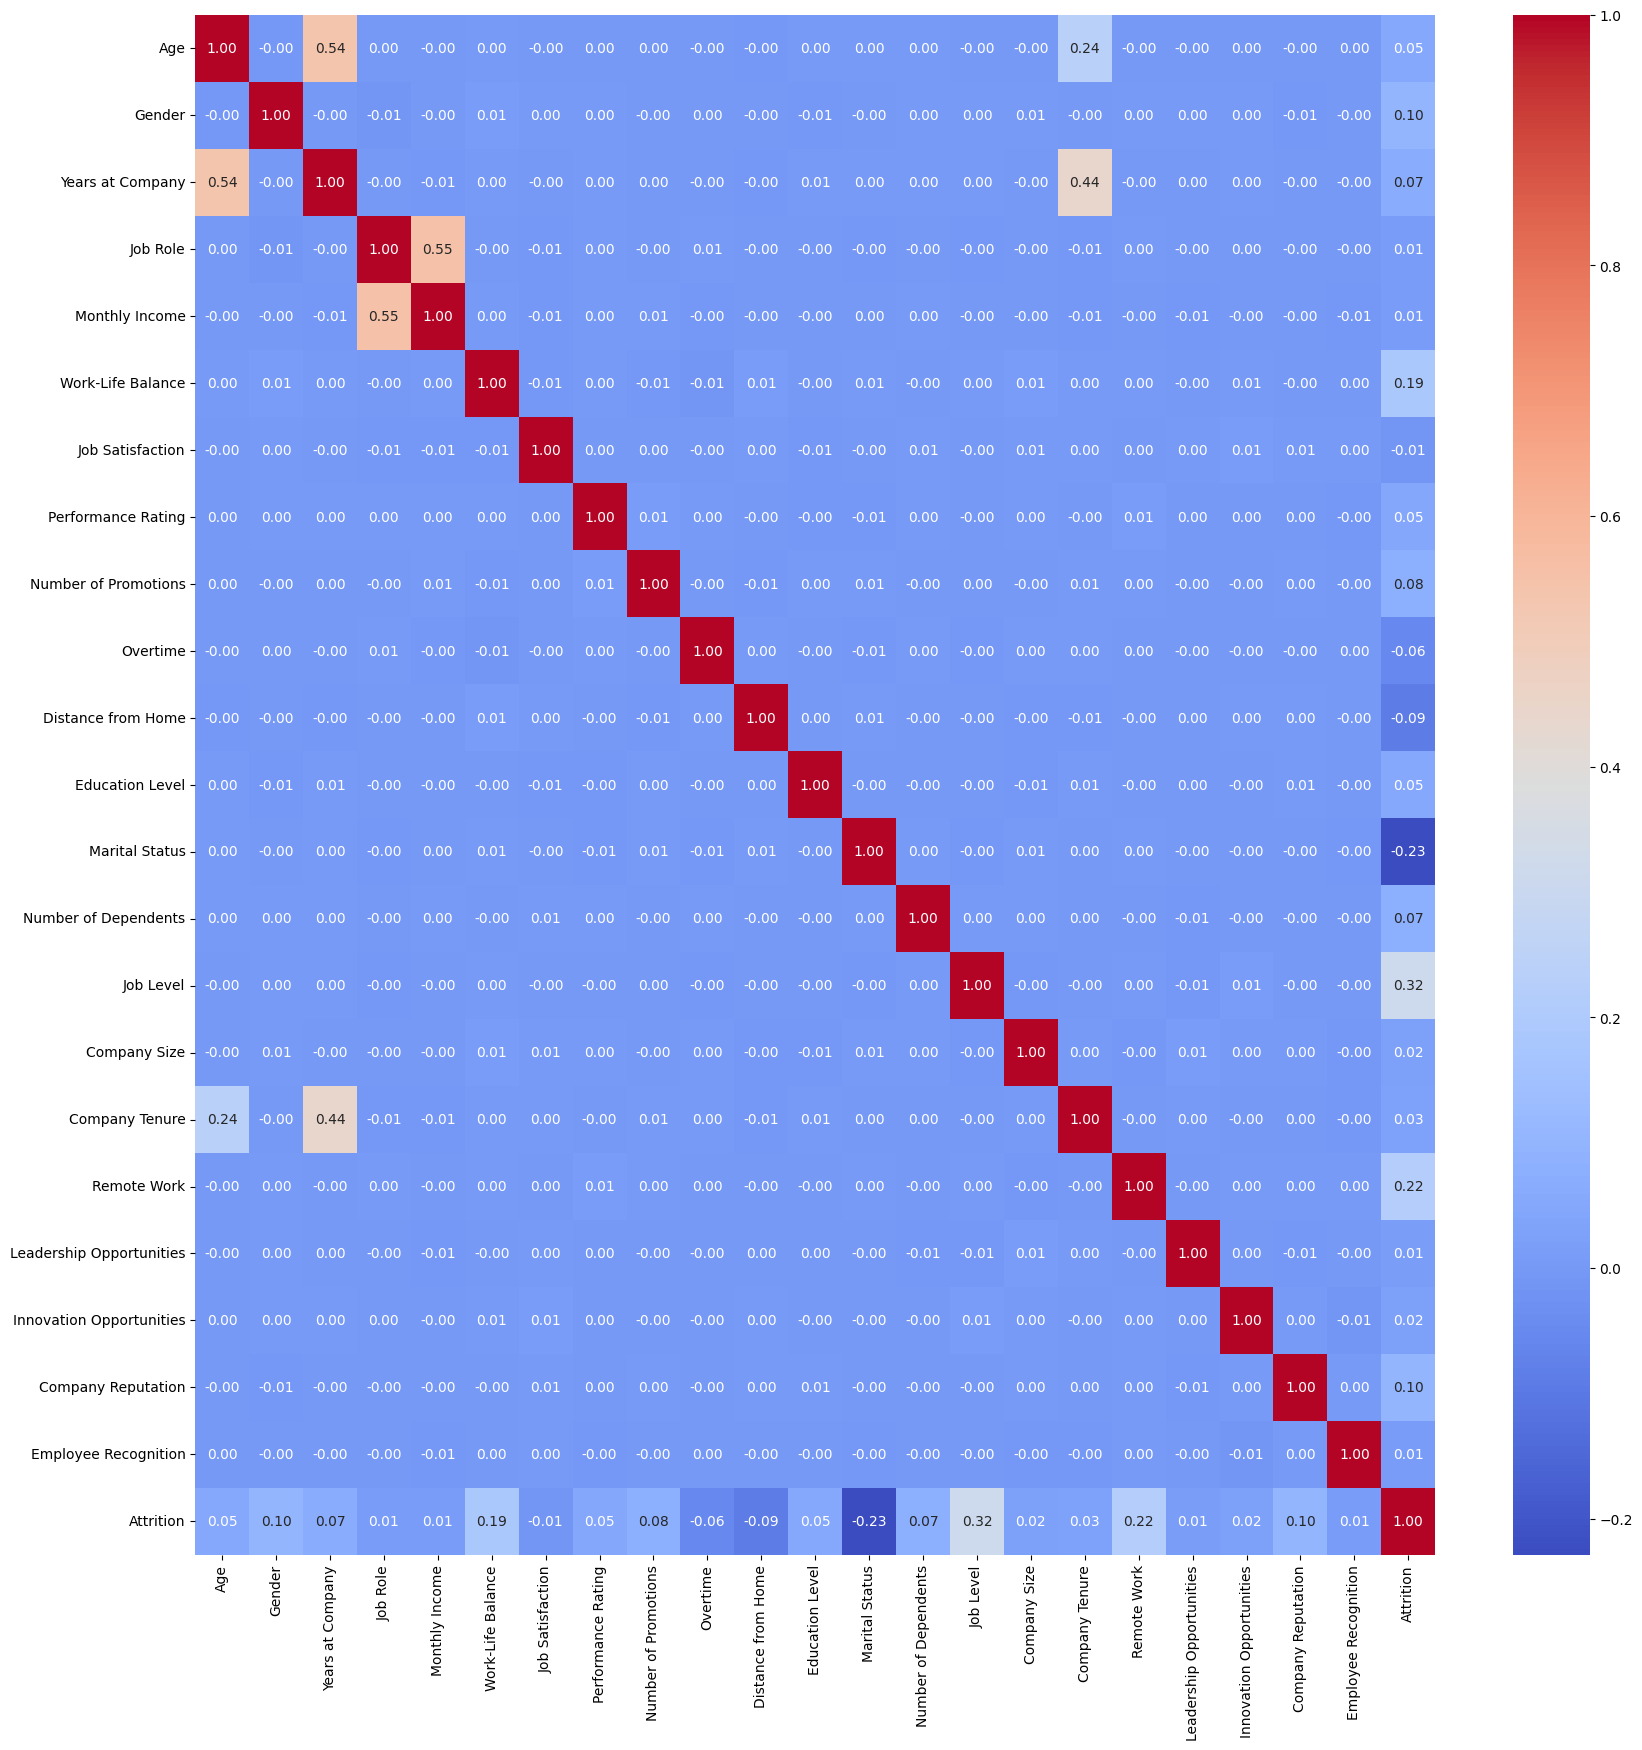

In [5]:
# Heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

In [6]:
# Select columns with correlation > 0.1
corr = df.corr()
corr = corr[corr['Attrition'] > 0.1]
corr = corr['Attrition']
corr

Gender                0.100653
Work-Life Balance     0.186255
Job Level             0.315275
Remote Work           0.221144
Company Reputation    0.101053
Attrition             1.000000
Name: Attrition, dtype: float64

In [7]:
selected_df = corr

# Train Test Split

In [15]:
# train test split
X = df[selected_df.index].drop('Attrition', axis=1)
y = df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shapes
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(59546, 5)
(14887, 5)
(59546,)
(14887,)


# Model

**Logistik Regression**

In [17]:
# Logistrik Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
lg_y_pred = logreg.predict(X_test)

print('Classification Report: \n', classification_report(y_test, lg_y_pred, digits=4))

Classification Report: 
               precision    recall  f1-score   support

           0     0.6829    0.6518    0.6670      7051
           1     0.6990    0.7277    0.7131      7836

    accuracy                         0.6917     14887
   macro avg     0.6910    0.6897    0.6900     14887
weighted avg     0.6914    0.6917    0.6912     14887



**KKN**

In [18]:
# KNN
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn_y_pred = knn.predict(X_test)

# Show all the matrix evaluation
print(classification_report(y_test, knn_y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.6106    0.6925    0.6490      7051
           1     0.6853    0.6026    0.6413      7836

    accuracy                         0.6452     14887
   macro avg     0.6480    0.6476    0.6452     14887
weighted avg     0.6499    0.6452    0.6449     14887



**Random Forest**

In [19]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_y_pred = rf.predict(X_test)

# Show all the matrix evaluation
print(classification_report(y_test, rf_y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.6656    0.7098    0.6870      7051
           1     0.7223    0.6790    0.7000      7836

    accuracy                         0.6936     14887
   macro avg     0.6939    0.6944    0.6935     14887
weighted avg     0.6954    0.6936    0.6938     14887



**Decesion Tree**

In [20]:
# Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
dt_y_pred = dt.predict(X_test)

# Show all the matrix evaluation
print(classification_report(y_test, dt_y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.6659    0.7097    0.6871      7051
           1     0.7223    0.6796    0.7003      7836

    accuracy                         0.6938     14887
   macro avg     0.6941    0.6946    0.6937     14887
weighted avg     0.6956    0.6938    0.6940     14887



**SVC**

In [21]:
# SVC
svc = SVC()
svc.fit(X_train, y_train)
svc_y_pred = svc.predict(X_test)

# Show all the matrix evaluation
print(classification_report(y_test, svc_y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.6600    0.7057    0.6821      7051
           1     0.7176    0.6729    0.6945      7836

    accuracy                         0.6885     14887
   macro avg     0.6888    0.6893    0.6883     14887
weighted avg     0.6903    0.6885    0.6887     14887



**Naive Bayes**

In [22]:
# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_y_pred = nb.predict(X_test)

# Show all the matrix evaluation
print(classification_report(y_test, nb_y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.6357    0.7644    0.6941      7051
           1     0.7408    0.6058    0.6665      7836

    accuracy                         0.6809     14887
   macro avg     0.6882    0.6851    0.6803     14887
weighted avg     0.6910    0.6809    0.6796     14887



**XGBoost**

In [23]:
# XGBoost Classifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb_y_pred = xgb.predict(X_test)

# Show all the matrix evaluation
print(classification_report(y_test, xgb_y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.6664    0.7067    0.6860      7051
           1     0.7209    0.6817    0.7008      7836

    accuracy                         0.6936     14887
   macro avg     0.6937    0.6942    0.6934     14887
weighted avg     0.6951    0.6936    0.6938     14887



**AdaBoost**

In [24]:
# ADaBoost Classifier
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
ada_y_pred = ada.predict(X_test)

# Show all the matrix evaluation
print(classification_report(y_test, ada_y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.6707    0.6958    0.6830      7051
           1     0.7167    0.6926    0.7044      7836

    accuracy                         0.6941     14887
   macro avg     0.6937    0.6942    0.6937     14887
weighted avg     0.6949    0.6941    0.6943     14887



# Visualisasi

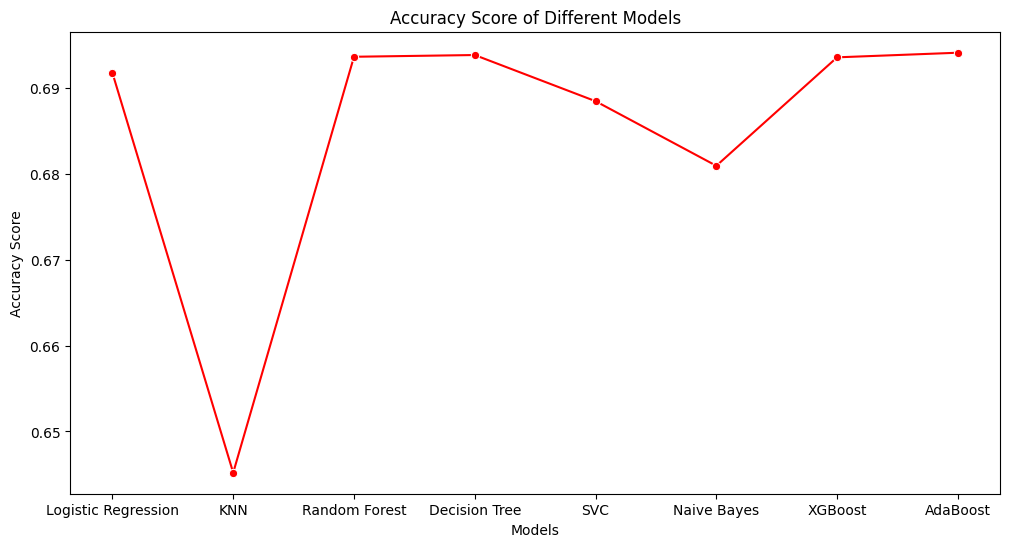

In [25]:
# Plotting the acuracy scores of all the models
import matplotlib.pyplot as plt
import seaborn as sns

models = ['Logistic Regression', 'KNN', 'Random Forest', 'Decision Tree', 'SVC', 'Naive Bayes', 'XGBoost', 'AdaBoost']
accuracy = [accuracy_score(y_test, lg_y_pred), accuracy_score(y_test, knn_y_pred), accuracy_score(y_test, rf_y_pred), accuracy_score(y_test, dt_y_pred), accuracy_score(y_test, svc_y_pred), accuracy_score(y_test, nb_y_pred), accuracy_score(y_test, xgb_y_pred), accuracy_score(y_test, ada_y_pred)]

plt.figure(figsize=(12, 6))
sns.lineplot(x=models, y=accuracy, marker='o', color='red')
plt.title('Accuracy Score of Different Models')
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.show()

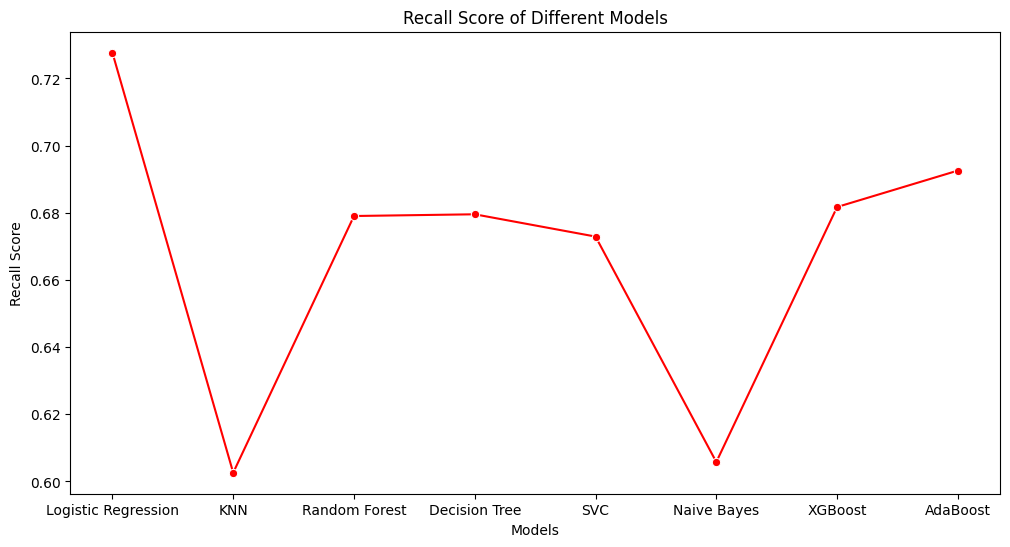

In [33]:
# Plotting the recall scores of all the models
models = ['Logistic Regression', 'KNN', 'Random Forest', 'Decision Tree', 'SVC', 'Naive Bayes', 'XGBoost', 'AdaBoost']
recall = [recall_score(y_test, lg_y_pred), recall_score(y_test, knn_y_pred), recall_score(y_test, rf_y_pred), recall_score(y_test, dt_y_pred), recall_score(y_test, svc_y_pred), recall_score(y_test, nb_y_pred), recall_score(y_test, xgb_y_pred), recall_score(y_test, ada_y_pred)]

plt.figure(figsize=(12, 6))
sns.lineplot(x=models, y=recall, marker='o', color='red')
plt.title('Recall Score of Different Models')
plt.xlabel('Models')
plt.ylabel('Recall Score')
plt.show()

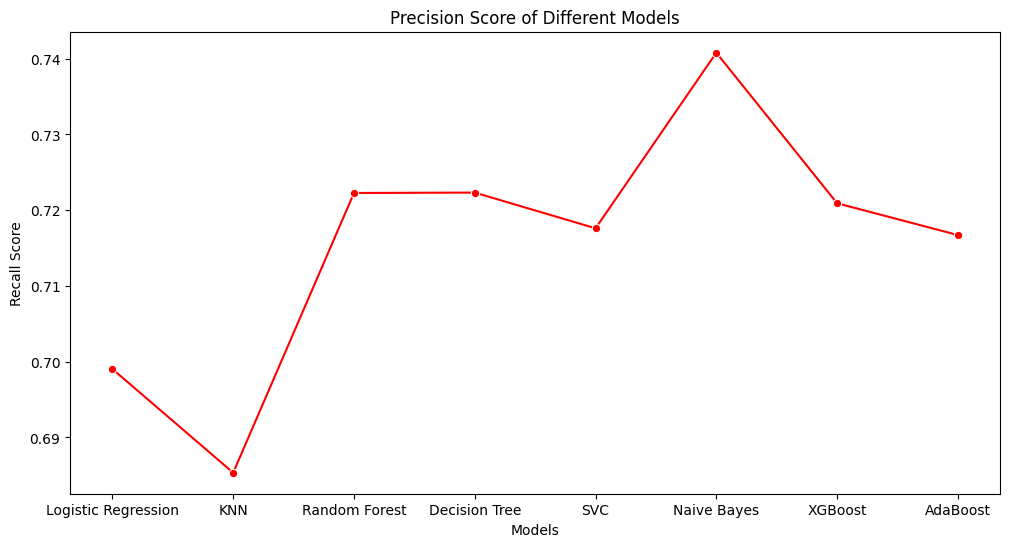

In [32]:
# Plotting the precision scores of all the models
models = ['Logistic Regression', 'KNN', 'Random Forest', 'Decision Tree', 'SVC', 'Naive Bayes', 'XGBoost', 'AdaBoost']
recall = [precision_score(y_test, lg_y_pred), precision_score(y_test, knn_y_pred), precision_score(y_test, rf_y_pred), precision_score(y_test, dt_y_pred), precision_score(y_test, svc_y_pred), precision_score(y_test, nb_y_pred), precision_score(y_test, xgb_y_pred), precision_score(y_test, ada_y_pred)]

plt.figure(figsize=(12, 6))
sns.lineplot(x=models, y=recall, marker='o', color='red')
plt.title('Precision Score of Different Models')
plt.xlabel('Models')
plt.ylabel('Recall Score')
plt.show()

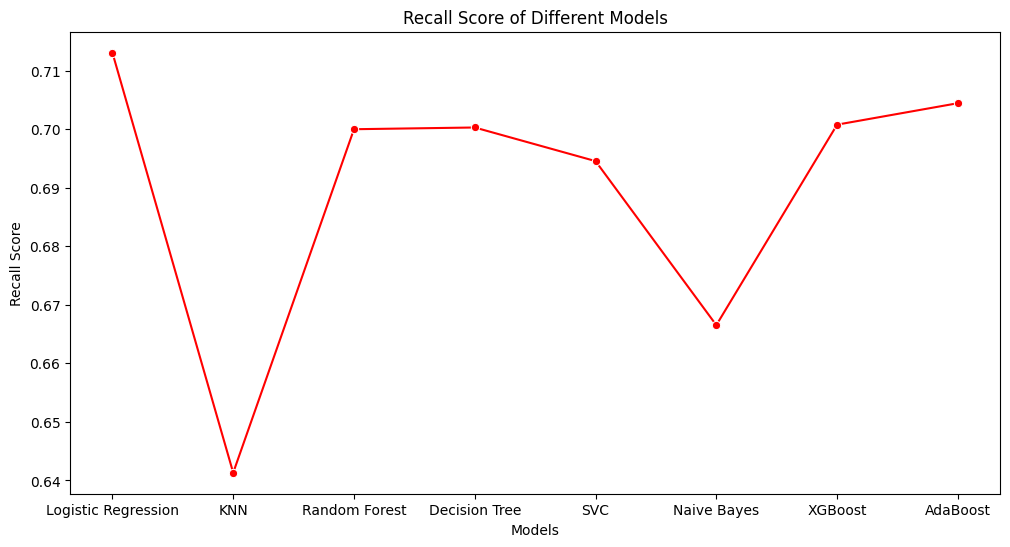

In [30]:
# Plotting the f1 scores of all the models
models = ['Logistic Regression', 'KNN', 'Random Forest', 'Decision Tree', 'SVC', 'Naive Bayes', 'XGBoost', 'AdaBoost']
recall = [f1_score(y_test, lg_y_pred), f1_score(y_test, knn_y_pred), f1_score(y_test, rf_y_pred), f1_score(y_test, dt_y_pred), f1_score(y_test, svc_y_pred), f1_score(y_test, nb_y_pred), f1_score(y_test, xgb_y_pred), f1_score(y_test, ada_y_pred)]

plt.figure(figsize=(12, 6))
sns.lineplot(x=models, y=recall, marker='o', color='red')
plt.title('F1 Score of Different Models')
plt.xlabel('Models')
plt.ylabel('Recall Score')
plt.show()

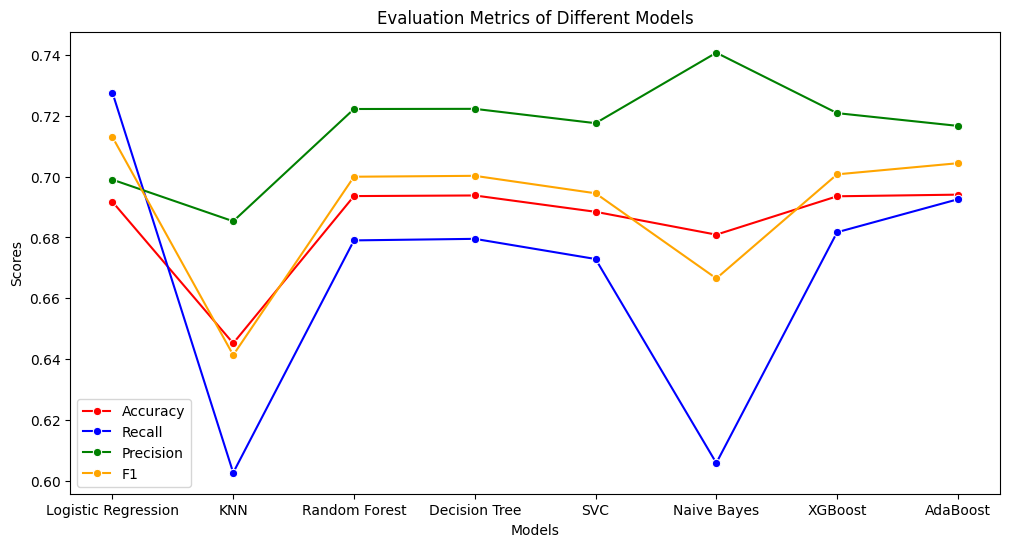

In [34]:
# plot all model all evaluation on one plot
models = ['Logistic Regression', 'KNN', 'Random Forest', 'Decision Tree', 'SVC', 'Naive Bayes', 'XGBoost', 'AdaBoost']
accuracy = [accuracy_score(y_test, lg_y_pred), accuracy_score(y_test, knn_y_pred), accuracy_score(y_test, rf_y_pred), accuracy_score(y_test, dt_y_pred), accuracy_score(y_test, svc_y_pred), accuracy_score(y_test, nb_y_pred), accuracy_score(y_test, xgb_y_pred), accuracy_score(y_test, ada_y_pred)]
recall = [recall_score(y_test, lg_y_pred), recall_score(y_test, knn_y_pred), recall_score(y_test, rf_y_pred), recall_score(y_test, dt_y_pred), recall_score(y_test, svc_y_pred), recall_score(y_test, nb_y_pred), recall_score(y_test, xgb_y_pred), recall_score(y_test, ada_y_pred)]
precision = [precision_score(y_test, lg_y_pred), precision_score(y_test, knn_y_pred), precision_score(y_test, rf_y_pred), precision_score(y_test, dt_y_pred), precision_score(y_test, svc_y_pred), precision_score(y_test, nb_y_pred), precision_score(y_test, xgb_y_pred), precision_score(y_test, ada_y_pred)]
f1 = [f1_score(y_test, lg_y_pred), f1_score(y_test, knn_y_pred), f1_score(y_test, rf_y_pred), f1_score(y_test, dt_y_pred), f1_score(y_test, svc_y_pred), f1_score(y_test, nb_y_pred), f1_score(y_test, xgb_y_pred), f1_score(y_test, ada_y_pred)]

plt.figure(figsize=(12, 6))
sns.lineplot(x=models, y=accuracy, marker='o', color='red', label='Accuracy')
sns.lineplot(x=models, y=recall, marker='o', color='blue', label='Recall')
sns.lineplot(x=models, y=precision, marker='o', color='green', label='Precision')
sns.lineplot(x=models, y=f1, marker='o', color='orange', label='F1')
plt.title('Evaluation Metrics of Different Models')
plt.xlabel('Models')
plt.ylabel('Scores')
plt.legend()
plt.show()

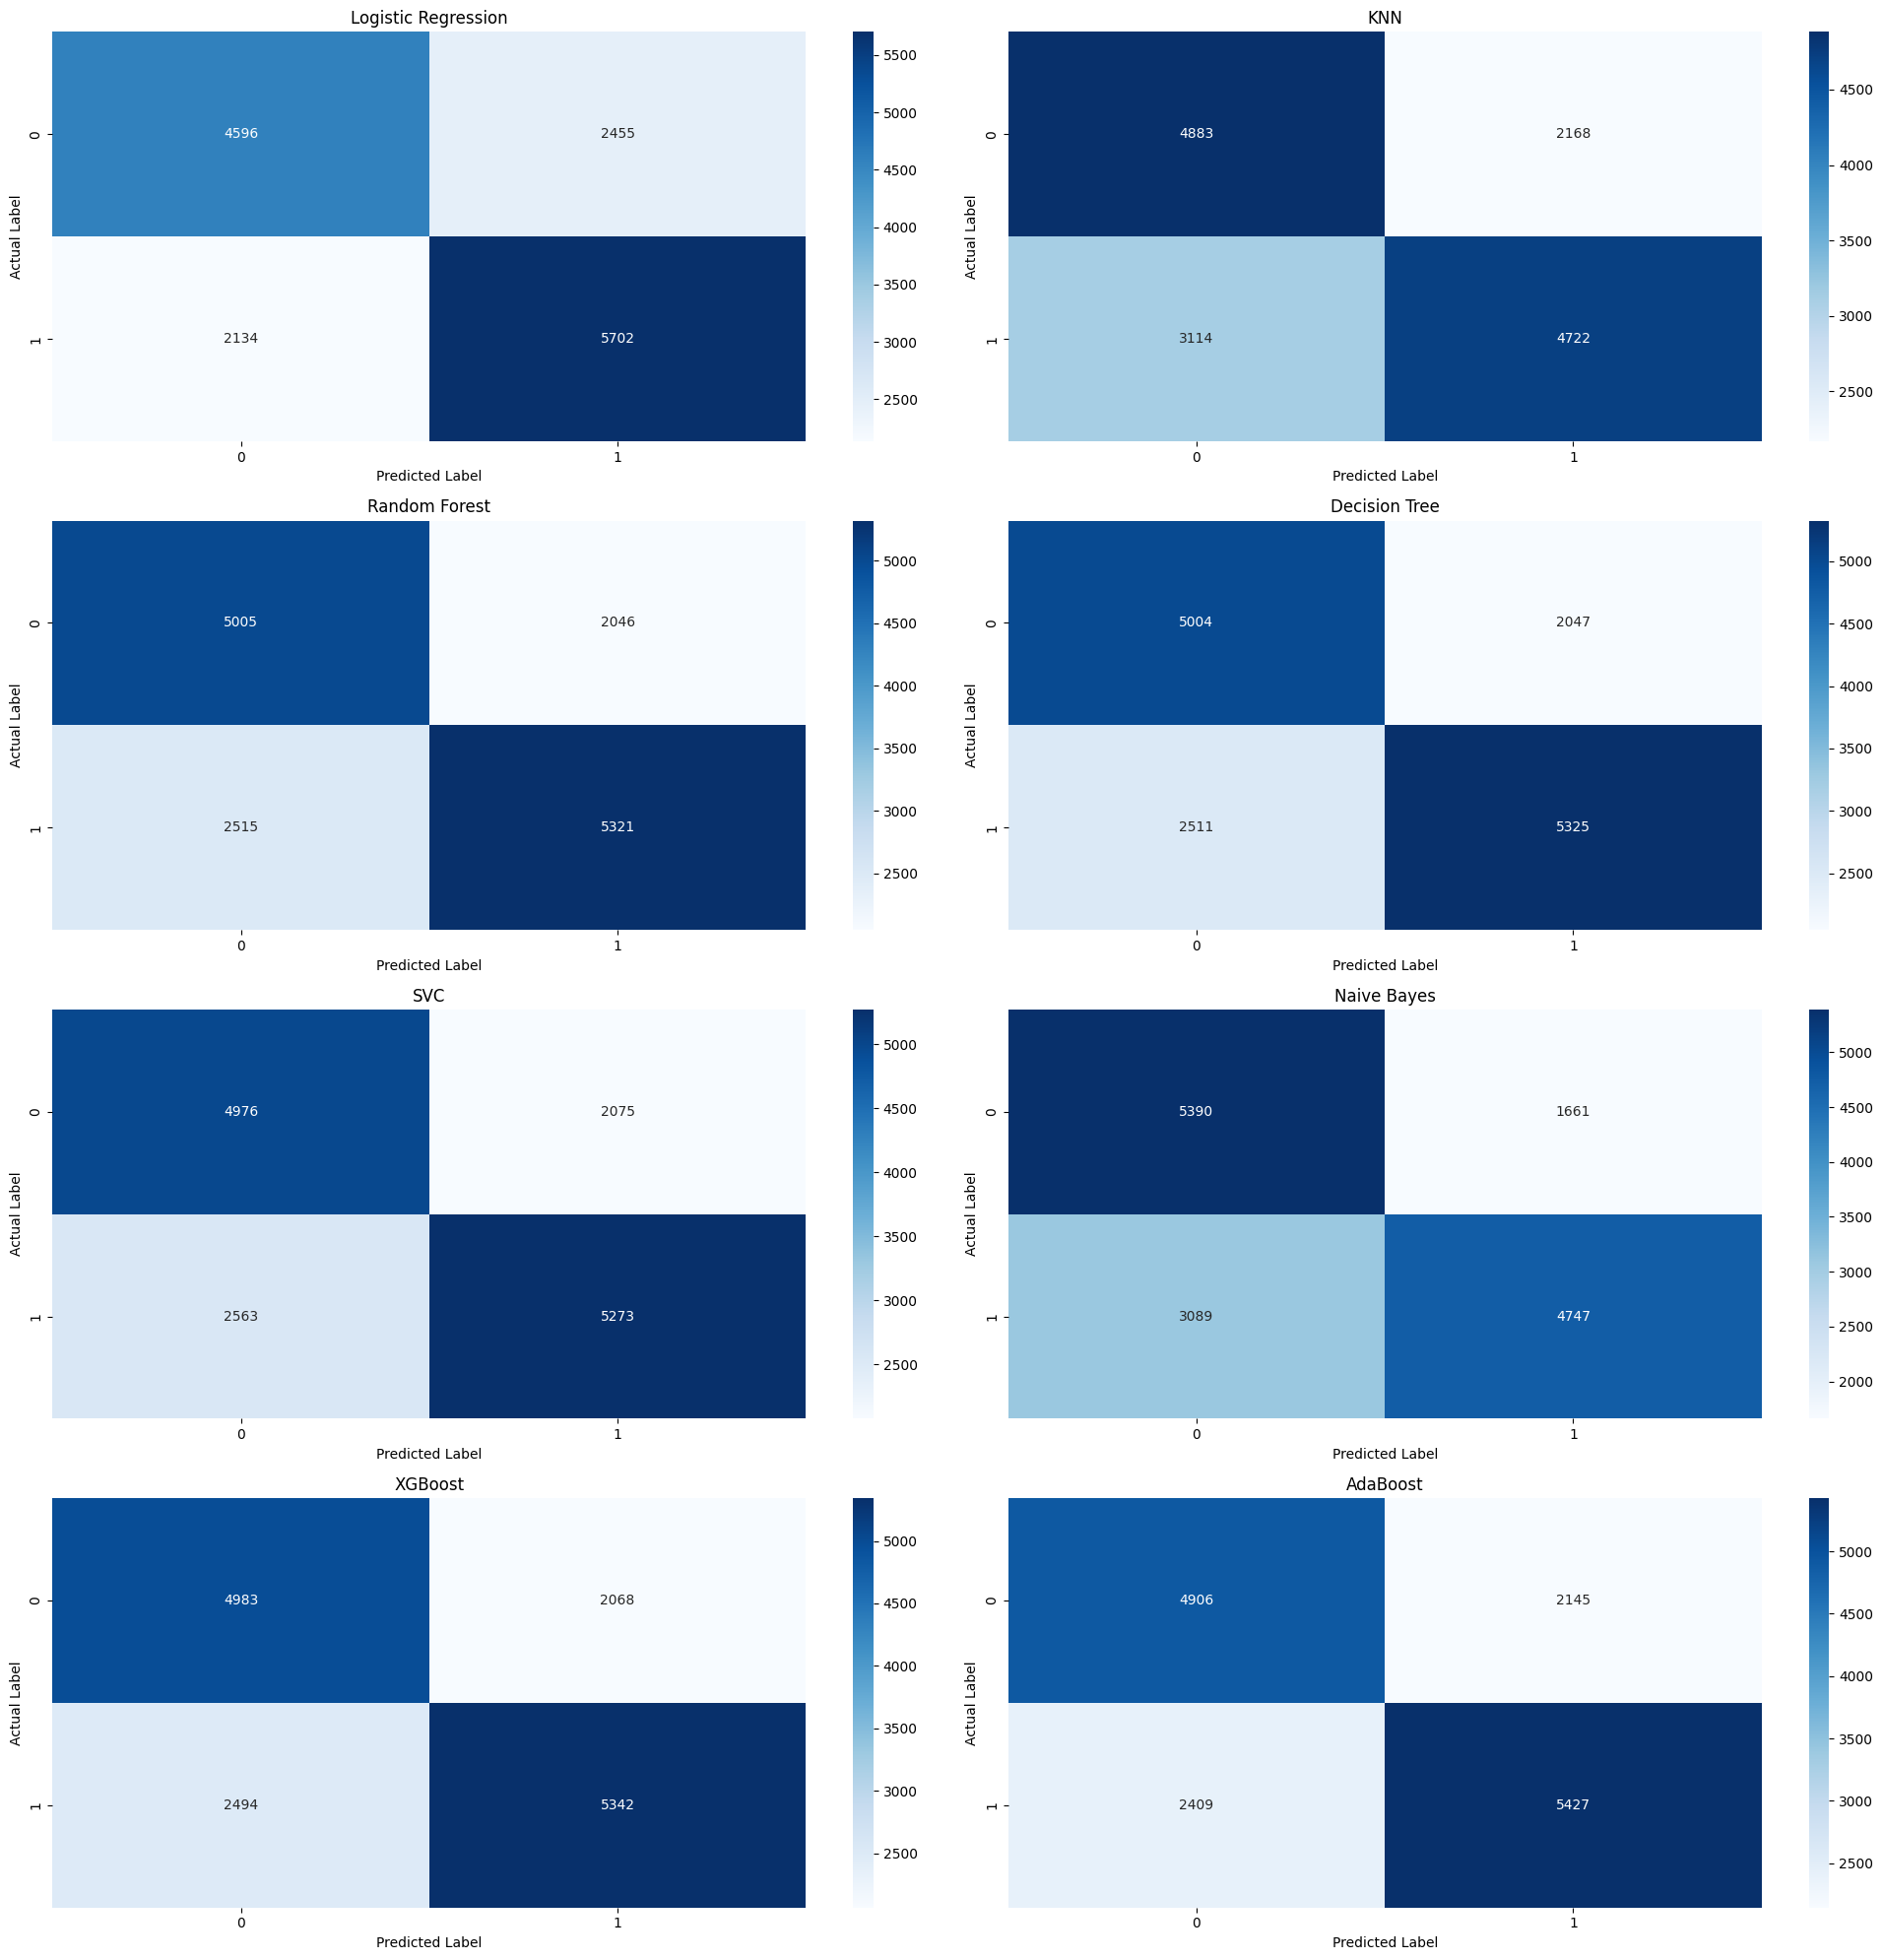

In [35]:
# Plot all confusion matrix on one plot
plt.figure(figsize=(20, 20))

plt.subplot(4, 2, 1)
sns.heatmap(confusion_matrix(y_test, lg_y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Logistic Regression')

plt.subplot(4, 2, 2)
sns.heatmap(confusion_matrix(y_test, knn_y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('KNN')

plt.subplot(4, 2, 3)
sns.heatmap(confusion_matrix(y_test, rf_y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Random Forest')

plt.subplot(4, 2, 4)
sns.heatmap(confusion_matrix(y_test, dt_y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Decision Tree')

plt.subplot(4, 2, 5)
sns.heatmap(confusion_matrix(y_test, svc_y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('SVC')

plt.subplot(4, 2, 6)
sns.heatmap(confusion_matrix(y_test, nb_y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Naive Bayes')

plt.subplot(4, 2, 7)
sns.heatmap(confusion_matrix(y_test, xgb_y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')   
plt.ylabel('Actual Label')
plt.title('XGBoost')

plt.subplot(4, 2, 8)
sns.heatmap(confusion_matrix(y_test, ada_y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('AdaBoost')


plt.tight_layout()
plt.show()
